In [1]:
from PIL import Image, ImageFilter
import os, glob, sys
import numpy as np
# import cv2

In [2]:
# im = Image.open("donkeycar_pics/image3.jpg")
# im_q = im.resize((640,480))

In [3]:
# im_q

In [4]:
# im_q

In [5]:
# im_q.convert("L")

In [6]:
# ar = np.array(im_q)
# ar.shape

In [7]:
# ar = ar[ar.shape[0]//3:,:,:]
# Image.fromarray(ar)

In [8]:
# table = [[0,0,0],[10,10,10],[20,20,20],[30,30,30],[40,40,40],[60,60,60],[80,80,80],[100,100,100]]
# fil = ImageFilter.Color3DLUT(2, table)
# im_q.filter(fil)

In [9]:
# red5_mask = np.all(np.abs(ar - [200,80,120]) < [30,30,30], axis=-1)
# blue2_mask = np.all(np.abs(ar - [55,40,95]) < [30,30,30], axis=-1)
# green2_mask = np.all(np.abs(ar - [150,150,145]) < [10,10,10], axis=-1)


In [10]:
# Image.fromarray(red5_mask)

In [11]:
# Image.fromarray(blue2_mask)

In [12]:
# Image.fromarray(green2_mask)

In [13]:
# mask = np.zeros(shape=ar.shape[:-1], dtype=bool)
# new_idx = mask.shape[0]//3
# mask[new_idx:,:] = True
# Image.fromarray(mask)

In [14]:
# mask_rgb = np.repeat(mask[:,:,np.newaxis],3,2)
# ar_filtered= np.multiply(ar,mask_rgb)
# Image.fromarray(ar_filtered)

In [15]:
# np.sum(red5_mask.astype(int))

In [131]:
from skimage.measure import label, regionprops

from skimage.color import label2rgb
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [134]:
'''Returns the image and the computed mask as PIL images'''
def img_preprocess(img_path):
    im = Image.open(img_path)
#     im.show()
    # reduce resolution
    im = im.resize((320,240))
#     im = im.quantize(colors=10, kmeans=50)
    ar = np.array(im)
    ar = ar[ar.shape[0]//3:-10,:,:]    
#     # normalize
#     ar[:,:,0] = (ar[:,:,0]-np.mean(ar[:,:,0]))*255/np.std(ar[:,:,0])
#     ar[:,:,1] = (ar[:,:,1]-np.mean(ar[:,:,1]))*255/np.std(ar[:,:,1])
#     ar[:,:,2] = (ar[:,:,2]-np.mean(ar[:,:,2]))*255/np.std(ar[:,:,2])
    # color mask
#     drivable_mask = np.all(np.abs(ar - [120,80,110]) < [40,90,40], axis=-1)
    red_mask = np.all(np.abs(ar - [200,80,120]) < [30,30,30], axis=-1)
    blue_mask = np.all(np.abs(ar - [55,40,95]) < [30,30,30], axis=-1) 
    green_mask = np.all(np.abs(ar - [150,150,145]) < [10,15,10], axis=-1)
    mask = np.logical_or(red_mask,blue_mask)
    mask = np.logical_or(mask,green_mask)
#     Image.fromarray(red_mask).show()
#     Image.fromarray(blue_mask).show()

    # count the number of objects in the image
    msk_label = label(mask)
    fig, ax = plt.subplots(figsize=(10, 6))
    image_label_overlay = label2rgb(msk_label, image=ar)
    ax.imshow(image_label_overlay)
#     print("number of regions =",len(regionprops(msk_label)))
    for region in regionprops(msk_label):    
#         print(region)
        if region.area >= 10:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
#             print(region.bbox)
        
    return Image.fromarray(ar), Image.fromarray(mask)

# def img_preprocess_cv2(img_path):
#     im = cv2.imread(img_path)
#     edges = cv2.Canny(imgArr, 100, 200, 3, L2gradient=True)

In [135]:
%%timeit
for img in glob.glob("donkeycar_pics/*3.jpg"):
    im, mask = img_preprocess(img)
    break # remove this if u like

NameError: name 'img_path' is not defined

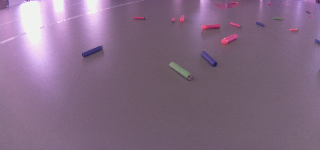

In [127]:
im

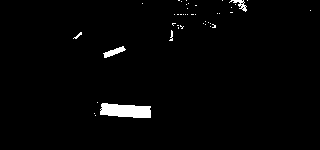

In [106]:
mask